In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing the dataset
data = pd.read_csv(r'C:\Users\PAVANI\OneDrive\Desktop\Major Project\precision-agriculture-using-machine-learning-main\Data\fertilizerR.csv')
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [6]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [7]:
#checking unique values
data.nunique()

Temparature    21
Humidity       34
Moisture       41
Soil_Type       5
Crop_Type      17
Nitrogen       47
Potassium      31
Phosphorous    36
Fertilizer     14
dtype: int64

In [8]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [9]:
data['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10'],
      dtype=object)

In [10]:
data['Crop_Type'].unique()

array(['rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'coffee', 'watermelon', 'Barley', 'kidneybeans', 'orange'],
      dtype=object)

In [11]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,552.000000,552.000000,552.000000,552,552,552.000000,552.000000,552.000000,552
unique,NaN,NaN,NaN,5,17,NaN,NaN,NaN,14
top,NaN,NaN,NaN,Loamy,Cotton,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,192,64,NaN,NaN,NaN,108
mean,28.630435,64.557971,42.840580,NaN,NaN,28.521739,10.144928,21.115942,NaN
std,5.088082,11.880236,11.507275,NaN,NaN,29.121989,13.456956,14.920514,NaN
min,0.000000,50.000000,25.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,26.000000,54.000000,33.000000,NaN,NaN,10.000000,0.000000,8.000000,NaN
50%,29.000000,62.000000,41.000000,NaN,NaN,15.000000,0.000000,20.000000,NaN
75%,32.000000,68.000000,51.000000,NaN,NaN,37.000000,18.000000,36.000000,NaN


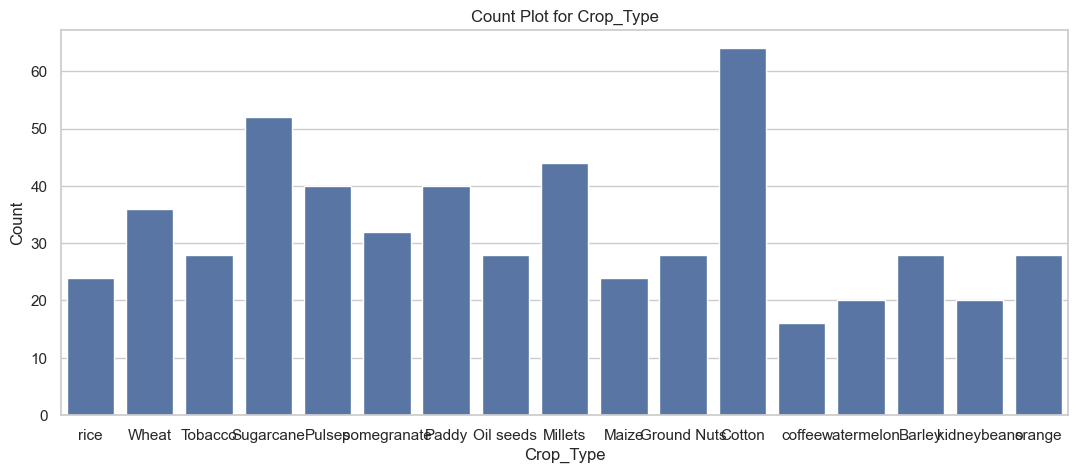

In [12]:
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=data, x='Crop_Type')
plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

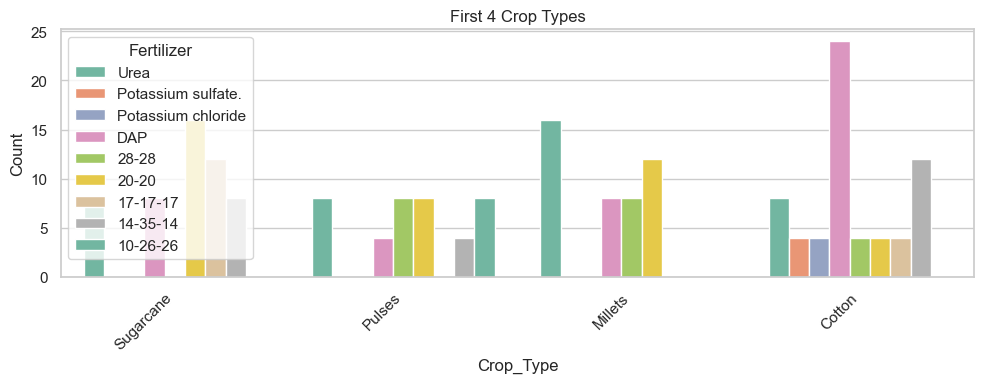

In [14]:
#first 4 crop types
part1_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[:4])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('First 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

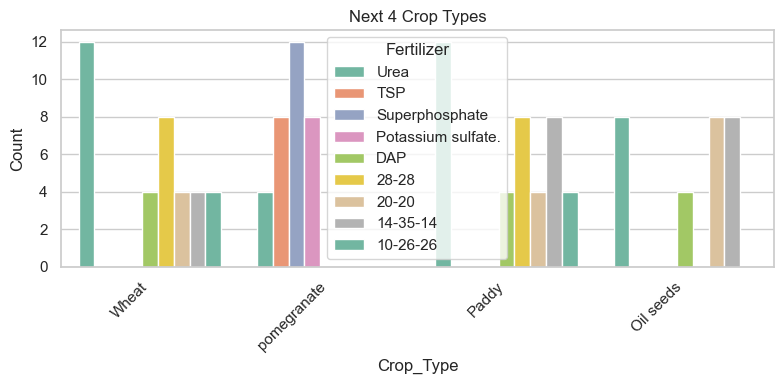

In [13]:
# Split the data into three parts: next 4 crop types
part2_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[4:8])]

# Create the second countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part2_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Next 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()


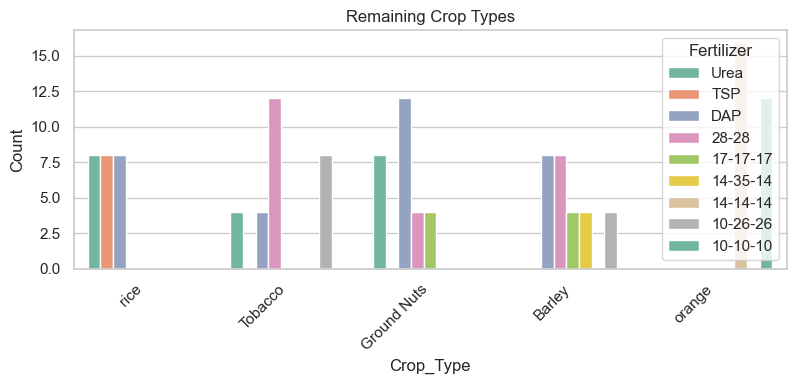

In [15]:
# Split the data into three parts: remaining crop types
part3_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[8:13])]

# Create the third countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part3_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Remaining Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [16]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder
#it  transforming non-numeric data into a numeric format

In [17]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [18]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [19]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-10-10,0
10-26-26,1
14-14-14,2
14-35-14,3
15-15-15,4
17-17-17,5
20-20,6
28-28,7
DAP,8


In [20]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (441, 8), y_train = (441,), x_test = (111, 8), y_test = (111,)


In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 213 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  441 non-null    int64
 1   Humidity     441 non-null    int64
 2   Moisture     441 non-null    int64
 3   Soil_Type    441 non-null    int64
 4   Crop_Type    441 non-null    int64
 5   Nitrogen     441 non-null    int64
 6   Potassium    441 non-null    int64
 7   Phosphorous  441 non-null    int64
dtypes: int64(8)
memory usage: 31.0 KB


In [33]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

acc = []  # This list will store accuracy for the test set
acc1 = []  # This list will store accuracy for the train set
model = []  # This list will store the model name

ds = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
ds.fit(x_train,y_train)

predicted_values = ds.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')

predicted_values = ds.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

print("DecisionTrees's Accuracy is: ", x*100, y*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  90.09009009009009 93.42403628117914


ValueError: Found input variables with inconsistent numbers of samples: [111, 441]

In [34]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)

predicted_values = NaiveBayes.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9459459459459459 0.9138321995464853


ValueError: Found input variables with inconsistent numbers of samples: [111, 441]

In [35]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
# transform testing dataabs
X_test_norm = norm.transform(x_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)

predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)

predicted_values = SVM.predict(X_train_norm)
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)

model.append('SVM')
print("SVM's Accuracy is: ", x,y)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.990990990990991 0.9931972789115646


ValueError: Found input variables with inconsistent numbers of samples: [111, 441]

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  # Import metrics module

# Initialize the list to store accuracy values
acc = []  # This list will store accuracy for the test set
acc1 = []  # This list will store accuracy for the train set
model = []  # This list will store the model name

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train, y_train)

# Predict on the test set
predicted_values = RF.predict(x_test)

# Calculate accuracy score for test set
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)  # Append accuracy of test set to acc list

# Predict on the train set
predicted_values = RF.predict(x_train)

# Calculate accuracy score for train set
y = metrics.accuracy_score(y_train, predicted_values)
acc1.append(y)  # Append accuracy of train set to acc1 list

model.append('RF')  # Add model name to the model list
print("RF's Accuracy on Test Set: ", x)
print("RF's Accuracy on Train Set: ", y)

# Print detailed classification report
print(metrics.classification_report(y_test, predicted_values))


RF's Accuracy on Test Set:  1.0
RF's Accuracy on Train Set:  1.0


ValueError: Found input variables with inconsistent numbers of samples: [111, 441]

In [37]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(RF,data,data.Fertilizer,cv=5)
print("Cross-validation score of RF is:",score)
score = cross_val_score(SVM,data,data.Fertilizer,cv=5)
print("Cross-validation score of SVM is:",score)
score = cross_val_score(NaiveBayes,data,data.Fertilizer,cv=5)
print("Cross-validation score of NaiveBayes is:",score)
score = cross_val_score(ds, data, data.Fertilizer,cv=5)
print("Cross-validation score of ds is:",score)

Cross-validation score of RF is: [1. 1. 1. 1. 1.]
Cross-validation score of SVM is: [0.96396396 0.92792793 0.91818182 0.88181818 0.98181818]
Cross-validation score of NaiveBayes is: [1. 1. 1. 1. 1.]
Cross-validation score of ds is: [1. 1. 1. 1. 1.]


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

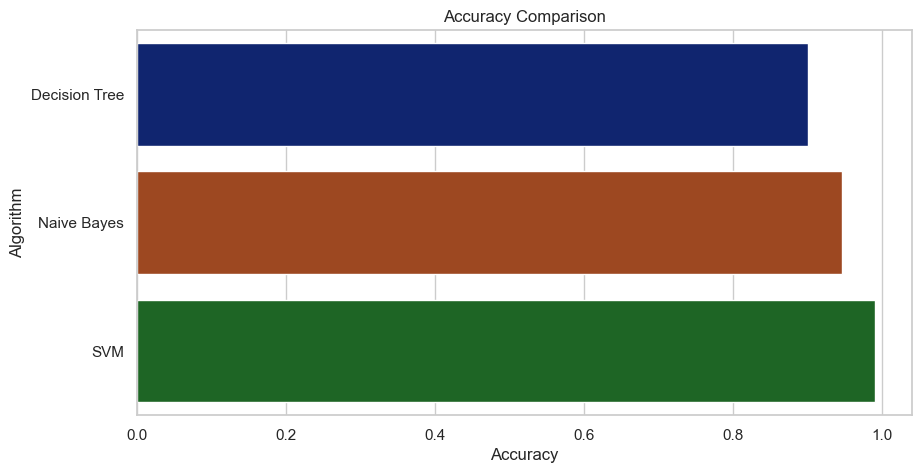

In [38]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [39]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(RF,pickle_out)
pickle_out.close()

In [40]:
model = pickle.load(open('classifier.pkl','rb'))
model.predict([[34,67,62,0,1,7,0,30]])

array([6])

In [41]:
model = pickle.load(open('classifier.pkl','rb'))
model.predict([[25,78,43,4,1,22,26,38]])

array([10])

In [42]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

In [43]:
ferti = pickle.load(open('fertilizer.pkl','rb'))
ferti.classes_[1]

'10-26-26'

In [44]:
# Load the trained model (if not already loaded)
model = pickle.load(open('classifier.pkl', 'rb'))

# Make predictions on the test set
test_predictions = model.predict(x_test)

# Evaluate the accuracy of the model on the test set
test_accuracy = metrics.accuracy_score(y_test, test_predictions)
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")

# Print detailed classification report for the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, test_predictions))


Accuracy on the test set: 100.00%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        18

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted av

In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example dataframe (replace this with your actual data)
data = {
    'Soil_Type': ['Loam', 'Clay', 'Sandy', 'Loam', 'Clay'],
    'Crop_Type': ['Wheat', 'Rice', 'Corn', 'Wheat', 'Rice'],
    'Temperature': [30, 25, 35, 28, 24],
    'Humidity': [70, 60, 80, 75, 65]
}

df = pd.DataFrame(data)

# Create LabelEncoder instance
label_encoder_soil = LabelEncoder()
label_encoder_crop = LabelEncoder()

# Fit the encoder with training data
label_encoder_soil.fit(df['Soil_Type'])  # Fit with training data
label_encoder_crop.fit(df['Crop_Type'])  # Fit with training data

# Transform the categorical columns
df['Soil_Type'] = label_encoder_soil.transform(df['Soil_Type'])
df['Crop_Type'] = label_encoder_crop.transform(df['Crop_Type'])

# Now, proceed with transforming your input data (assuming input_data is defined similarly)
input_data = pd.DataFrame([['Sandy', 'Corn', 32, 78]], columns=['Soil_Type', 'Crop_Type', 'Temperature', 'Humidity'])
input_data['Soil_Type'] = label_encoder_soil.transform(input_data['Soil_Type'])
input_data['Crop_Type'] = label_encoder_crop.transform(input_data['Crop_Type'])

# Now input_data can be used for prediction
print(input_data)


   Soil_Type  Crop_Type  Temperature  Humidity
0          2          0           32        78


In [1]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, "crop_recommendation_rf_model.pkl")

print("Model saved successfully!")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\PAVANI\OneDrive\Desktop\Major Project\precision-agriculture-using-machine-learning-main\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\PAVANI\AppData\Local\Temp\ipykernel_1928\1954353175.py", line 4, in <module>
    joblib.dump(rf_model, "crop_recommendation_rf_model.pkl")
                ^^^^^^^^
NameError: name 'rf_model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\PAVANI\OneDrive\Desktop\Major Project\precision-agriculture-using-machine-learning-main\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PAVANI\OneDrive\Desktop\Major Project\precision-agriculture-using-machine-learning-ma